To run the notebook, you must install skfeature:

`pip3 install skfeature-chappers`

To install skfeature-chapper.

In [1]:
import generate_data as gd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest, SelectPercentile
from sklearn.preprocessing import MinMaxScaler
from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from filters import lda,knn, run_filters

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'run_funcs'

In [ ]:
nr_features = 30
X,y = gd.gaussian_clusters(nr_features=nr_features, nr_classes=20, \
                           nr_data_points=200, random_diag=True, variance_size=5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
run_filters(X_train, y_train, X_test, y_test)

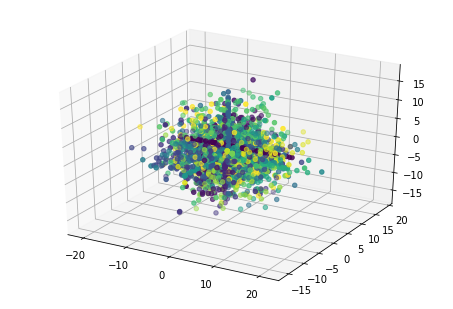

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

## Filter Evaluation

In [14]:
keep_k = 2
ks = range(1,nr_features+1)

### F-score

In [15]:
for keep_k in ks:
    print("--------------- K = {} ---------------".format(keep_k))
    X_fscore = SelectKBest(f_classif, k=keep_k).fit_transform(X, y)
    X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(
        X_fscore, y, test_size=0.33, random_state=42)

    knn_filtered_score, knn_unfiltered_score = knn(X_fs_train, y_fs_train, X_fs_test, y_fs_test, X_train, y_train, X_test, y_test)
    lda_filtered_score, lda_unfiltered_score = lda(X_fs_train, y_fs_train, X_fs_test, y_fs_test, X_train, y_train, X_test, y_test)

    print("KNN Unfiltered Score: {:0.4f}, KNN Filtered Score: {:0.4f}".format(knn_unfiltered_score, knn_filtered_score))
    print("LDA Unfiltered Score: {:0.4f}, LDA Filtered Score: {:0.4f}".format(lda_unfiltered_score, lda_filtered_score))

--------------- K = 1 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.7303
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.1038
--------------- K = 2 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.8023
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.1803
--------------- K = 3 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.8409
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.2811
--------------- K = 4 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.7758
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.2621
--------------- K = 5 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.7273
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.2674
--------------- K = 6 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.7553
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.2424
--------------- K = 7 ---------------
KNN Unfiltered Score: 0.5667, KNN Filtered Score: 

### Mutual Information

In [6]:
X_mi = SelectKBest(mutual_info_classif, k=keep_k).fit_transform(X, y)
X_mi_train, X_mi_test, y_mi_train, y_mi_test = train_test_split(
    X_mi, y, test_size=0.33, random_state=42)

knn_filtered_score, knn_unfiltered_score = knn(X_mi_train, y_mi_train, X_mi_test, y_mi_test, X_train, y_train, X_test, y_test)
lda_filtered_score, lda_unfiltered_score = lda(X_mi_train, y_mi_train, X_mi_test, y_mi_test, X_train, y_train, X_test, y_test)

print("KNN Unfiltered Score: {:0.4f}, KNN Filtered Score: {:0.4f}".format(knn_unfiltered_score, knn_filtered_score))
print("LDA Unfiltered Score: {:0.4f}, LDA Filtered Score: {:0.4f}".format(lda_unfiltered_score, lda_filtered_score))

KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.8250
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.2000


### Chi Square

In [7]:
scaler = MinMaxScaler()
scaler.fit(X)
# We need [0,1] for all values for chi2 to work
X_normalized = scaler.transform(X)

X_chi2 = SelectKBest(chi2, k=keep_k).fit_transform(X_normalized, y)
X_chi2_train, X_chi2_test, y_chi2_train, y_chi2_test = train_test_split(
    X_chi2, y, test_size=0.33, random_state=42)

knn_filtered_score, knn_unfiltered_score = knn(X_chi2_train, y_chi2_train, X_chi2_test, y_chi2_test, X_train, y_train, X_test, y_test)
lda_filtered_score, lda_unfiltered_score = lda(X_chi2_train, y_chi2_train, X_chi2_test, y_chi2_test, X_train, y_train, X_test, y_test)

print("KNN Unfiltered Score: {:0.4f}, KNN Filtered Score: {:0.4f}".format(knn_unfiltered_score, knn_filtered_score))
print("LDA Unfiltered Score: {:0.4f}, LDA Filtered Score: {:0.4f}".format(lda_unfiltered_score, lda_filtered_score))

KNN Unfiltered Score: 0.5667, KNN Filtered Score: 0.6644
LDA Unfiltered Score: 0.3871, LDA Filtered Score: 0.1788
